# Mapping autism prevalence among Original Medicare beneficiaries (2007 to 2018)

In [23]:
required_packages <- c("patchwork", "tidyverse", "usmap")
new_packages <- required_packages[!(required_packages %in% installed.packages()[,"Package"])]
if(length(new_packages)) install.packages(new_packages)

## Prevalence by county (2007)

Rows: 3248 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): fips, Prevalence

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 3248

[1] 1500

[1] 1748

[1] 1120

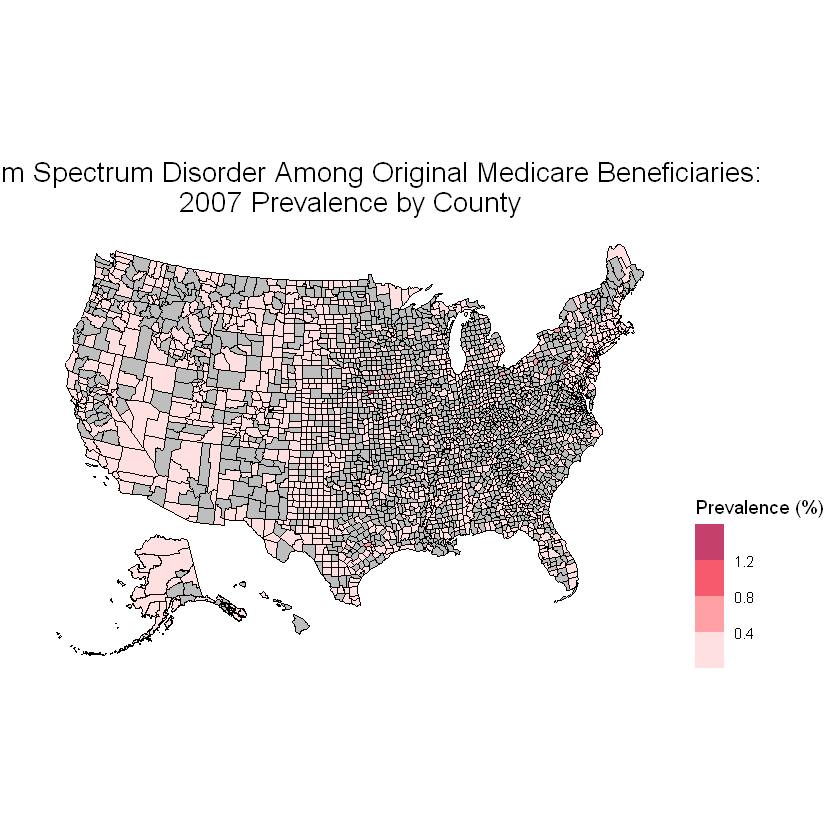

In [24]:
library(ggplot2)
library(readr)
library(usmap)

# Import county-level data for 2007
counties_2007 <- read_csv("./Data/Autism prevalence (%) among all Original Medicare beneficiaries by county, 2007.csv")

# Create a filled map
plot_usmap(data = counties_2007, values = "Prevalence") +
    ggtitle("Autism Spectrum Disorder Among Original Medicare Beneficiaries:\n2007 Prevalence by County") +
    scale_fill_steps2(low = "white", mid = "#F65A6D", high = "#7D1D67", midpoint = 1.0, na.value = "gray", name = "Prevalence (%)") +
    theme(legend.position = "right", legend.title = element_text(size=rel(1.25)), legend.text = element_text(size=rel(1)), plot.title = element_text(hjust = 0.5, size=rel(1.85))) +
    theme(plot.margin = margin(0.25, 0.25, 0.25, 0.5, "cm")) 

# ggsave("Autism prevalence among Original Medicare beneficiaries by county (2007).png", width = 9, height = 5, units = "in", dpi = 300)

nrow(counties_2007) # 3248 possible counties
nrow(na.omit(counties_2007)) # 1500 counties reported data
sum(!complete.cases(counties_2007)) # 1748 counties did not report data
nrow(subset(counties_2007, counties_2007$Prevalence == 0)) # 1120 counties reported no autism diagnoses (zero)

## Prevalence by county (2018)

Rows: 3250 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): fips, Prevalence

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 3250

[1] 1625

[1] 1625

[1] 384

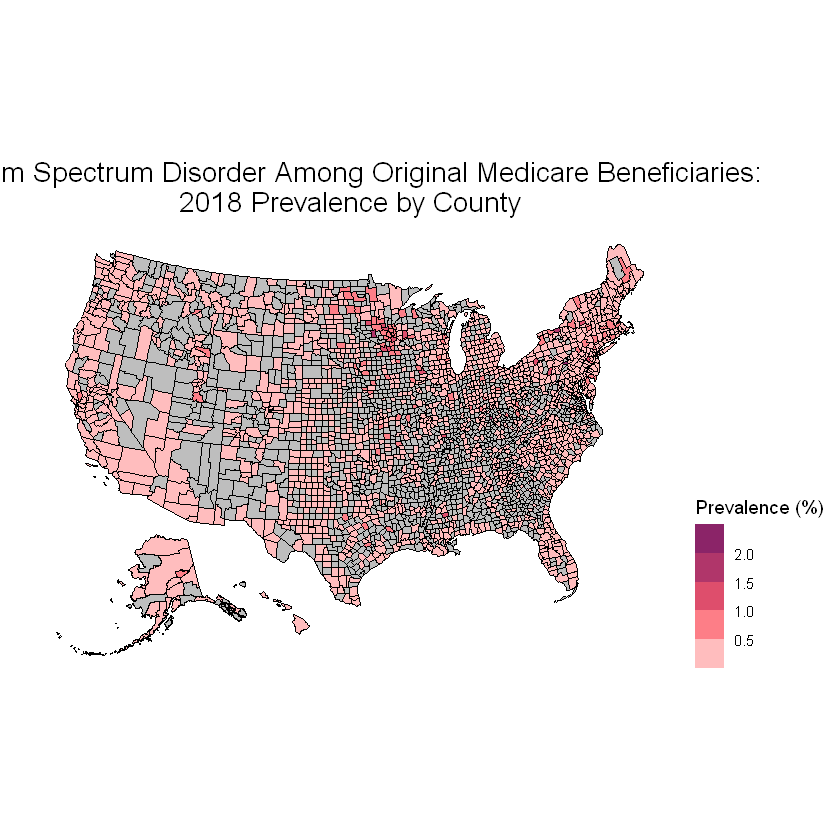

In [25]:
library(ggplot2)
library(readr)
library(usmap)

# Import county-level data for 2018
counties_2018 <- read_csv("./Data/Autism prevalence (%) among all Original Medicare beneficiaries by county, 2018.csv")

# Create a filled map
plot_usmap(data = counties_2018, values = "Prevalence") +
    ggtitle("Autism Spectrum Disorder Among Original Medicare Beneficiaries:\n2018 Prevalence by County") +
    scale_fill_steps2(low = "white", mid = "#F65A6D", high = "#7D1D67", midpoint = 1.0, na.value = "gray", name = "Prevalence (%)") +
    theme(legend.position = "right", legend.title = element_text(size=rel(1.25)), legend.text = element_text(size=rel(1)), plot.title = element_text(hjust = 0.5, size=rel(1.85))) +
    theme(plot.margin = margin(0.25, 0.25, 0.25, 0.5, "cm")) 

# ggsave("Autism prevalence among Original Medicare beneficiaries by county (2018).png", width = 9, height = 5, units = "in", dpi = 300)

nrow(counties_2018) # 3250 possible counties
nrow(na.omit(counties_2018)) # 1625 counties reported data
sum(!complete.cases(counties_2018)) # 1625 counties did not report data
nrow(subset(counties_2018, counties_2018$Prevalence == 0)) # 384 counties reported no autism diagnoses (zero)

## Prevalence by state

In [26]:
library(ggplot2)
library(readr)
library(usmap)

# Import state-level data for the years 2007 to 2018
data <- read_csv("./Data/Data related to autism (ASD) among Original Medicare beneficiaries by state, 2007 to 2018.csv")

# Remove territories and "Unknown"
unique(data$State)
data <- subset(data, data$State != "Unknown" & data$State != "Puerto Rico" & data$State != "Virgin Islands")

# Select rows where data describes all beneficiaries in 2007
prevalenceByState2007 <- subset(data, data$Year == "2007" & data$Bene_Age_Lvl == "All" & data$Bene_Demo_Desc == "All")

# Show the beginning of the resulting data frame
head(prevalenceByState2007)

# Select rows where data describes all beneficiaries in 2018
prevalenceByState2018 <- subset(data, data$Year == "2018" & data$Bene_Age_Lvl == "All" & data$Bene_Demo_Desc == "All")

# Show the beginning of the resulting data frame
head(prevalenceByState2018)

# We can already see that the numbers for "Prvlnc" (Prevalence) are much higher in 2018 than in 2007

Rows: 19440 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): file, State, Bene_Age_Lvl, Bene_Demo_Lvl, Bene_Demo_Desc, Bene_Cond
dbl (7): Year, Bene_Geo_Cd, Prvlnc, Tot_Mdcr_Stdzd_Pymt_PC, Tot_Mdcr_Pymt_PC...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Alabama"              "Alaska"               "Arizona"             
 [4] "Arkansas"             "California"           "Colorado"            
 [7] "Connecticut"          "Delaware"             "District of Columbia"
[10] "Florida"              "Georgia"              "Hawaii"              
[13] "Idaho"                "Illinois"             "Indiana"             
[16] "Iowa"                 "Kansas"               "Kentucky"            
[19] "Louisiana"            "Maine"                "Maryland"            
[22] "Massachusetts"        "Michigan"             "Minnesota"           
[25] "Mississippi"          "Missouri"             "Montana"             
[28] "Nebraska"             "Nevada"               "New Hampshire"       
[31] "New Jersey"           "New Mexico"           "New York"            
[34] "North Carolina"       "North Dakota"         "Ohio"                
[37] "Oklahoma"             "Oregon"               "Pennsylvania"        
[40] "Puerto Rico"          "Rhode Island"         "South Carolina"      
[43] "South Dakota"         "Tennessee"            "Texas"               
[46] "Unknown"              "Utah"                 "Vermont"             
[49] "Virgin Islands"       "Virginia"             "Washington"          
[52] "West Virginia"        "Wisconsin"            "Wyoming"

file,Year,State,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2007-12-31.csv,2007,Alabama,1,All,All,All,Autism Spectrum Disorders,3e-04,8416.681,7740.367,0.2361,911.7647
2007-12-31.csv,2007,Alaska,2,All,All,All,Autism Spectrum Disorders,8e-04,6226.635,7395.052,NA,1170.7317
2007-12-31.csv,2007,Arizona,4,All,All,All,Autism Spectrum Disorders,3e-04,7005.645,7999.186,NA,1062.0690
2007-12-31.csv,2007,Arkansas,5,All,All,All,Autism Spectrum Disorders,4e-04,8801.350,8251.839,NA,645.3488
2007-12-31.csv,2007,California,6,All,All,All,Autism Spectrum Disorders,6e-04,8159.122,9879.504,0.2129,911.8199
2007-12-31.csv,2007,Colorado,8,All,All,All,Autism Spectrum Disorders,5e-04,6343.026,6613.322,NA,888.2979


file,Year,State,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-12-31.csv,2018,Alabama,1,All,All,All,Autism Spectrum Disorders,0.0017,7389.224,6834.349,0.1681,941.7373
2018-12-31.csv,2018,Alaska,2,All,All,All,Autism Spectrum Disorders,0.0026,4940.112,6718.399,NA,1381.8182
2018-12-31.csv,2018,Arizona,4,All,All,All,Autism Spectrum Disorders,0.0010,7413.680,7974.981,0.1944,1095.0966
2018-12-31.csv,2018,Arkansas,5,All,All,All,Autism Spectrum Disorders,0.0016,8446.303,7835.010,0.2421,974.2857
2018-12-31.csv,2018,California,6,All,All,All,Autism Spectrum Disorders,0.0022,9165.877,11832.165,0.2473,1101.7776
2018-12-31.csv,2018,Colorado,8,All,All,All,Autism Spectrum Disorders,0.0019,7693.510,8084.692,0.1198,1086.7179


    state             Prevalence    
 Length:41          Min.   :0.3000  
 Class :character   1st Qu.:0.5000  
 Mode  :character   Median :0.6000  
                    Mean   :0.6146  
                    3rd Qu.:0.8000  
                    Max.   :0.9000  

    state             Prevalence 
 Length:0           Min.   : NA  
 Class :character   1st Qu.: NA  
 Mode  :character   Median : NA  
                    Mean   :NaN  
                    3rd Qu.: NA  
                    Max.   : NA  

    state             Prevalence   
 Length:36          Min.   :2.000  
 Class :character   1st Qu.:2.375  
 Mode  :character   Median :2.800  
                    Mean   :3.056  
                    3rd Qu.:3.200  
                    Max.   :7.600  

    state             Prevalence   
 Length:6           Min.   :4.000  
 Class :character   1st Qu.:4.300  
 Mode  :character   Median :4.500  
                    Mean   :4.933  
                    3rd Qu.:4.700  
                    Max.   :7.600  

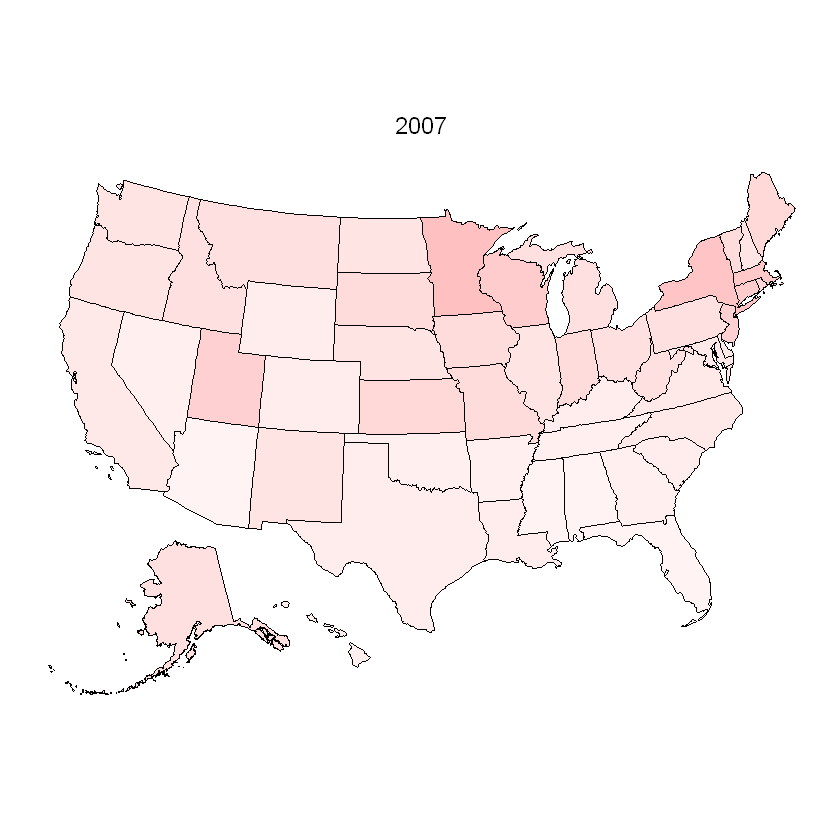

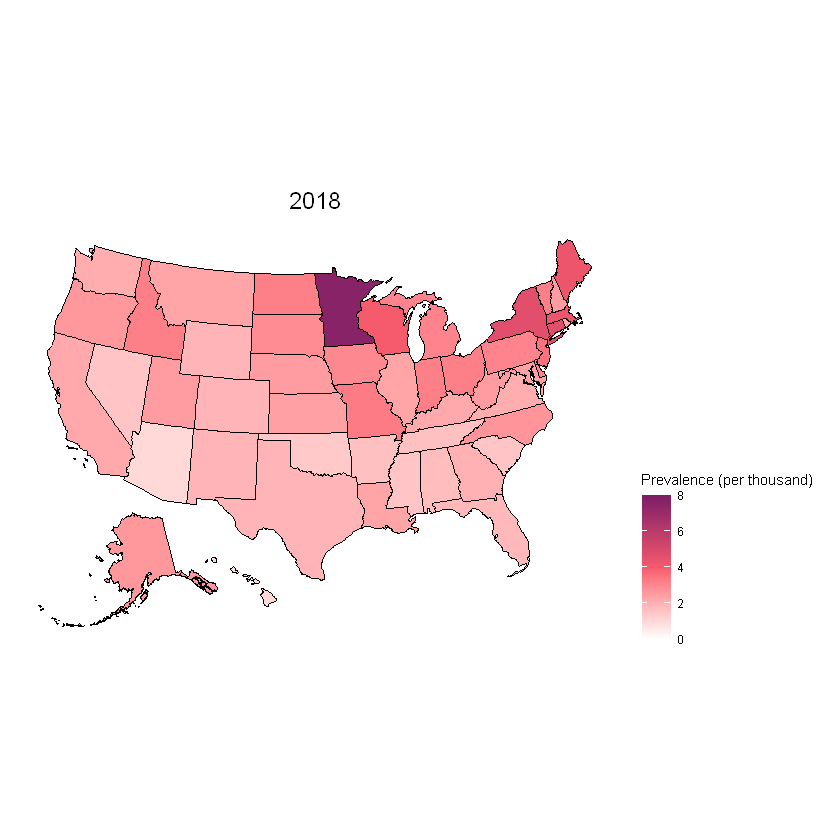

In [27]:
# Convert decimal values to per thousand beneficaries
prevalenceByState2007$Prevalence <- prevalenceByState2007$Prvlnc * 1000
prevalenceByState2018$Prevalence <- prevalenceByState2018$Prvlnc * 1000

# Select only the relevant columns: Selecting "Bene_Geo_Cd" (the FIPS state code) would also work with slight changes
filtered2007 <- prevalenceByState2007[ , c("State", "Prevalence")]
filtered2018 <- prevalenceByState2018[ , c("State", "Prevalence")]

# Rename columns: usmap wants a column named "state" or "fips" (i.e., if "Bene_Geo_Cd" was selected above)
names(filtered2007) <- c("state", "Prevalence")
names(filtered2018) <- c("state", "Prevalence")

# Only 10 states had a prevalence for autism at or above 1/1000 beneficiaries in 2007
other <- subset(filtered2007, filtered2007$Prevalence < 1)
summary(other)

# Create and preview a map for 2007
map2007 <- plot_usmap(data = filtered2007, values = "Prevalence") +
    ggtitle("2007") +
    scale_fill_gradientn(limits = c(0, 8), colors = c("white", "#F65A6D", "#7D1D67"), name = "Prevalence (per thousand)") +
    theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size=rel(1.5)))

map2007

# Every state had a prevalence at or above 1/1000 in 2018
other2018 <- subset(filtered2018, filtered2018$Prevalence < 1)
summary(other2018)

# 36 states had a prevalence at or above 2/1000 in 2018
twoPercent <- subset(filtered2018, filtered2018$Prevalence >= 2)
summary(twoPercent)

# Six states (Wisconsin, Maine, Massachusetts, Connecticut, New York, and Minnesota) had a prevalence at or above 4/1000 in 2018
fourPercent <- subset(filtered2018, filtered2018$Prevalence >= 4)
summary(fourPercent)

# Create and preview a map for 2018
map2018 <- plot_usmap(data = filtered2018, values = "Prevalence") +
    ggtitle("2018") +
    scale_fill_gradientn(limits = c(0, 8), colors = c("white", "#F65A6D", "#7D1D67"), name = "Prevalence (per thousand)") +
    theme(legend.position = "right", plot.title = element_text(hjust = 0.5, size=rel(1.5)))

map2018

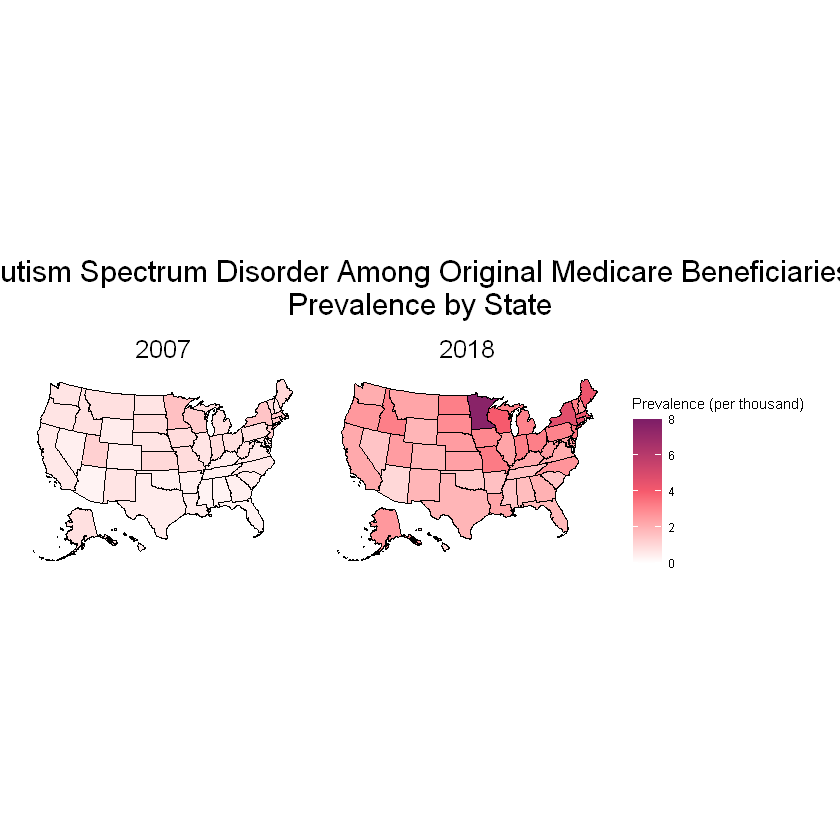

In [28]:
# Combine the two maps and add an overall title
library(patchwork)
combined <- map2007 + map2018 + plot_annotation(title = "Autism Spectrum Disorder Among Original Medicare Beneficiaries:\nPrevalence by State") & theme(plot.title = element_text(hjust = 0.5, size = rel(1.65)))
combined

## Prevalence by New Jersey county (2018)

,County,long,lat,group,order,region,Prevalence
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>
1,atlantic,-74.98299,39.51690,1742,51277,new jersey,3.3
2,atlantic,-74.89132,39.58566,1742,51278,new jersey,3.3
3,atlantic,-74.70797,39.73462,1742,51279,new jersey,3.3
4,atlantic,-74.69077,39.72316,1742,51280,new jersey,3.3
5,atlantic,-74.66213,39.67733,1742,51281,new jersey,3.3
6,atlantic,-74.65640,39.64295,1742,51282,new jersey,3.3


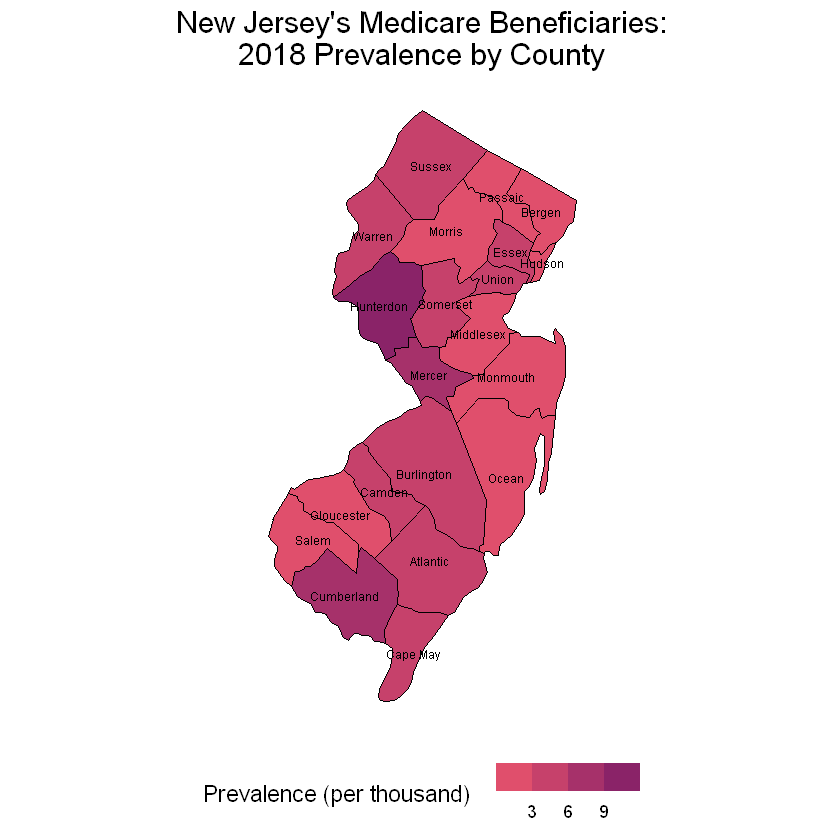

In [29]:
library(ggplot2)
library(stringr)

usa <- map_data("usa")
states <- map_data("state")
counties <- map_data("county")
nj <- read.csv("./Data/Data related to autism (ASD) among Original Medicare beneficiaries by NJ county, 2007 to 2018.csv")

nj_df <- subset(states, region == "new jersey")
nj_county <- subset(counties, region == "new jersey")

prevalenceByNJcounty2018 <- subset(nj, nj$Year == "2018" & nj$Bene_Age_Lvl == "All" & nj$Bene_Demo_Desc == "All")

# Convert decimal values to per thousand beneficaries
prevalenceByNJcounty2018$Prevalence <- prevalenceByNJcounty2018$Prvlnc * 1000

# Filter for county-level data and merge with the county map data
prevalenceByNJcounty2018$Bene_Geo_Desc.2 <- tolower(prevalenceByNJcounty2018$Bene_Geo_Desc.2)
filtered <- prevalenceByNJcounty2018[ , c("Bene_Geo_Desc.2", "Prevalence")]
names(filtered) <- c("County", "Prevalence")
names(nj_county)[names(nj_county) == "subregion"] <- "County"
merged <- merge(nj_county, filtered, by = "County")

# https://stackoverflow.com/questions/9441436/ggplot-centered-names-on-a-map
cnames <- aggregate(cbind(long, lat, group) ~ County, data = merged, FUN = function(x) mean(range(x)))
cnames$County <- str_to_title(cnames$County)

head(merged)

map <- ggplot(data = merged, mapping = aes(x = long, y = lat, group = group)) +
    coord_fixed(1.3) +
    geom_polygon(color = "black", aes(fill = Prevalence)) +
    geom_text(data = cnames, aes(label = County), size = 2.5) +
    scale_fill_steps2(low = "white", mid = "#F65A6D", high = "#7D1D67", na.value = "gray", name = "Prevalence (per thousand)") +
    ggtitle("New Jersey's Medicare Beneficiaries:\n2018 Prevalence by County") +
    theme(axis.text.x = element_blank(), axis.title.x = element_blank(), axis.text.y = element_blank(), axis.title.y = element_blank(), axis.ticks = element_blank(), rect = element_blank(), legend.position = "bottom", legend.title = element_text(size=rel(1.25)), legend.text = element_text(size=rel(1)), plot.title = element_text(hjust = 0.5, size = rel(1.65)))

map

# ggsave("Autism prevalence among Original Medicare beneficiaries in New Jersey (2018).png", width = 5, height = 5, units = "in", dpi = 300)